# V01: A First Introduction to `aggregate`

**Objectives** Introduce aggregate probability distributions and the `aggregate` library for working with them. 

**Audience** New user with no knowlege of aggregate distributions or insurance.

**Prerequisites** Basic probability theory; Python and pandas programming.

**Context** Up next: `aggregate` for Actuarial Students.

**Overview**
1. Definition of aggregate (compound) probability distributions.
2. Applications and examples.
3. Installing the `aggregate` package.
4. Simple discrete examples illustrating using dice throws.
5. Determining moments of and plotting aggregate distributions.

# V02: `aggregate` for Actuarial Students 

**Objectives** Introduce aggregate probability distributions and the `aggregate` library for working with them in the context of exam and university courses in actuarial modeling. 

**Audience** Actuarial science university student or junior analyst working in insurance.

**Prerequisites** V01 plus familiarity with aggregate probability distribution (as covered on SOA STAM, CAS MAS I, IFOA CS-2) and basic insurance terminology (insurance company operations).

**Context** Up next: `aggregate` for Actuaries.

**Overview**
1. Installing the `aggregate` package.
2. Working with simple discrete aggregate probability distributions.
3. Determining moments of and plotting aggregate distributions.

# V03: `aggregate` for Actuaries 

**Objectives** Introduce aggregate probability distributions and the `aggregate` library for working with then in the context of real-world, but basic, actuarial problems 
illustrated using the Tweedie distribution from GLM modeling. 

**Audience** Actuaries at the Associate or Fellow level.

**Prerequisites** V02 plus awareness of the use aggregate probability distribution in insurance (as covered on CAS Part 8).

**Context** Up next: `aggregate` for individual risk pricing actuaries.

**Overview**
1. Installing the `aggregate` package.
2. Computing an aggregate distribution for a portfolio of risks with given frequency, severity, limit, and attachment assumptions.
3. Different ways to determine exposure (prem x lr; claim count; losses).
4. Determining limited expected values.

# Introductions to `aggregate`

| Audience                        | `Underwriter`   | Features and Prerequisites                                                                          | Problems                               |
|:--------------------------------|:----------------|:----------------------------------------------------------------------------------------------------|:---------------------------------------|
| Novice                          | `student_build`  | Intro to aggregate distributions in general language; simple discrete examples                      |                                        |
| Actuarial students              | `student_bulid` | Similar to novice but using insurance terminology                                                   | SOA STAM, CAS MAS1, IFOA CS2, KPW, LDA |
| Actuaries                       | `actuary_build` | Introduction using the Tweedie distribution as motivation                                           | CAS Part 8                             |
| Individual risk pricing actuary | `actuary_build`      | LEV, ILFs, layering, aggregate insurance charge (Table L, M); solving problems from CAS             | CAS Part 8                             |
| Reinsurance pricing actuary     | `actuary_build`      | Exposure rating, swings and slides, aggregate stop loss                                             | CAS Part 8                             |
| Reserving actuary               | `actuary_build` | Loss emergence, IBNR and case reserve ranges                                                        |                                        |
| Capital modeler                 | `capital_build` | Use of samples, VaR, TVaR, tail evaluation, risk drivers; Iman-Conover; rearrangement algorithm     | CAS Part 9                             |
| Strategic planning              | `capital_build`   | Capital allocation in a portfolio; alternative pricing methodologies; bounds on net/gross pricing   | CAS Part 9                             |
| Catastrophe modeler             | `capital_build`     | Thick tailed Poisson Pareto and lognormal models; aggregate PMLs; occurrence and aggregate layering | CAS Part 9                             |
| Act Sci or Risk Mgmt professor  | `student_build` | Solving text book problems (similar to Student intro); generate realistic, motivating examples      |                                        |
| Developer                       | `dev_build`     | Class model, `agg` language grammar, internal design                                                |                                        |
| Debugger                        | `debug_build`   | Watch inner workings!                                                                               |                                        |                                                                                                |                                        |

For each audience there is a customized `Underwriter` object 

## Basic prequisies for all introductions

* Basic probability including discrete and continuous distributions, mean, variance, standard deviation, pdf, cdf. 
* Python programming, including familiarity with `pandas`. `numpy`, `matplotlib`, and `scipy.stats` useful but not essential.



## Provenance

* Oct 2022 created new 


In [6]:
p = Path.home() / 'aggregate/databases'
p = Path.home() / 'agg'
p = Path('/s/telos/python/aggregate_project/aggregate/agg')


time: 0 ns (started: 2022-10-28 20:43:25 +01:00)


In [7]:
p.exists()

True

time: 0 ns (started: 2022-10-28 20:43:25 +01:00)


In [14]:
entries = []
for fn in p.glob('*.agg'):
    txt = fn.read_text(encoding='utf-8')
    stxt = txt.split('\n')
    for r in stxt:
        rs = r.split(' ')
        if rs[0] in ['agg', 'port', 'dist', 'distortion', 'sev']:
            entries.append(rs[:2])

time: 0 ns (started: 2022-10-28 20:46:34 +01:00)


In [15]:
pd.DataFrame(entries, columns=['kind', 'name'])

,kind,name
0,sev,One
1,agg,Basic.Dice.Roll
2,agg,Basic.Twelve.Dice.Rolls
3,agg,Basic.Poisson.Dice.Rolls
4,agg,Basic.Tweedie
...,...,...
156,agg,I.Re15
157,agg,J.Tweedie0
158,agg,J.Tweedie1
159,agg,J.Tweedie2


time: 0 ns (started: 2022-10-28 20:46:48 +01:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


time: 843 ms (started: 2022-10-28 20:51:40 +01:00)


In [2]:
build.knowledge

spec  \
kind name                                                                                          
agg  A.Basic01   {'name': 'A.Basic01', 'freq_name': 'empirical', 'freq_a': [1.0], 'freq_b': [...   
     A.Basic02   {'name': 'A.Basic02', 'freq_name': 'empirical', 'freq_a': [12.0], 'freq_b': ...   
     A.Basic03   {'name': 'A.Basic03', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...   
     A.Basic04   {'name': 'A.Basic04', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...   
     A.Basic05   {'name': 'A.Basic05', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...   
...                                                                                          ...   
sev  directorsB  {'sev_name': 'lognorm', 'sev_mean': 10000000.0, 'sev_cv': 1.75, 'sev_scale':...   
     directorsC  {'sev_name': 'lognorm', 'sev_mean': 10000000.0, 'sev_cv': 2.0, 'sev_scale': ...   
     liaba       {'sev_name': 'lognorm', 'sev_mean': 50.0, 'sev_cv': 1.0, 'sev_scale': 1.0, '...   
     liabb       {'sev_name': 'lognorm', 'sev_mean': 24.0, 'sev_cv': 1.5, 'sev_scale': 1.0, '...   
     liabc       {'sev_name': 'lognorm', 'sev_mean': 50.0, 'sev_cv': 2.0, 'sev_scale': 1.0, '...   

                                                                                         program  
kind name                                                                                         
agg  A.Basic01   agg A.Basic01 dfreq  [1]  dsev  [0 1]                                   note...  
     A.Basic02   agg A.Basic02 dfreq  [12]  dsev  [0 1]                                  note...  
     A.Basic03   agg A.Basic03 dfreq  [1 2 3]  dsev  [1 2 10]                            note...  
     A.Basic04   agg A.Basic04 dfreq  [1 2 3]   [.5 1/4 1/4]  dsev  [1 2 10]               no...  
     A.Basic05   agg A.Basic05 dfreq  [1 2 3]    dsev  [1 2 10]   [.4 .4 .2]               no...  
...                                                                                          ...  
sev  directorsB  sev directorsB lognorm 10000000 cv 1.75 note{directors and officers liabilit...  
     directorsC  sev directorsC lognorm 10000000 cv 2.0  note{directors and officers liabilit...  
     liaba                       sev liaba lognorm 50 cv 1.0 note{prems ops A, lognormal cv=1.0}  
     liabb                       sev liabb lognorm 24 cv 1.5 note{prems ops B, lognormal cv=1.5}  
     liabc                       sev liabc lognorm 50 cv 2.0 note{prems ops C, lognormal cv=2.0}  

[159 rows x 2 columns]

time: 31 ms (started: 2022-10-28 20:51:41 +01:00)


In [1]:
from aggregate import build
from aggregate.utilities import make_mosaic_figure, show_fig

Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


time: 1.01 s (started: 2022-10-28 21:46:34 +01:00)


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,1.000,1.000,0.000,0.000,0.000,,
Freq,3.500,,,487.950m,,,0.000
Agg,3.500,3.500,222.045a,487.950m,487.950m,888.178a,0.000


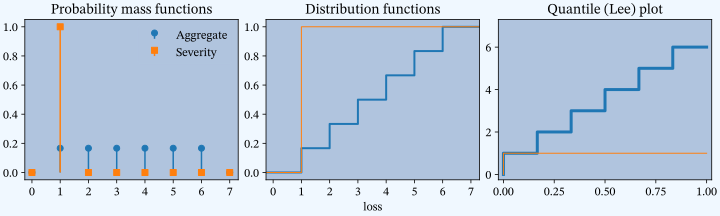

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.500,0.000,487.950m,487.950m,-333.067a,0.000
Freq,5.000,,,447.214m,,,447.214m
Agg,17.500,17.500,-1.665f,497.613m,497.613m,-127.676f,556.503m


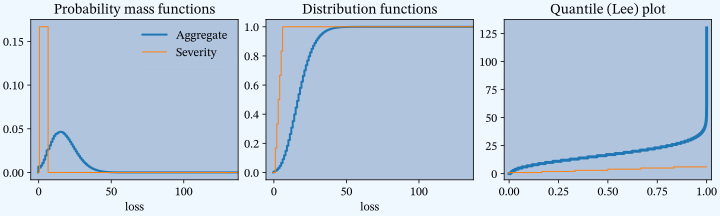

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.500,0.000,487.950m,487.950m,-333.067a,0.000
Freq,5.000,,,0.000,,,
Agg,17.500,17.500,-444.089a,218.218m,218.218m,-11.213f,0.000


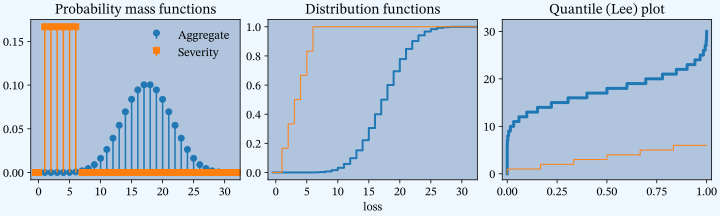

time: 1.34 s (started: 2022-10-28 21:17:47 +01:00)


In [8]:
ans, df = build.show('B.*Roll', logger_level=30)

In [10]:
act = build('agg Tw1 10 claims sev gamma 100 cv 0.5 poisson')
act

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,100.000,100.000,400.575p,500.000m,500.000m,63.030n,1000.000m
Freq,10.000,,,316.228m,,,316.228m
Agg,1000.000,1000.000,-377.837p,353.553m,353.553m,6.547n,424.264m


time: 203 ms (started: 2022-10-28 21:18:58 +01:00)


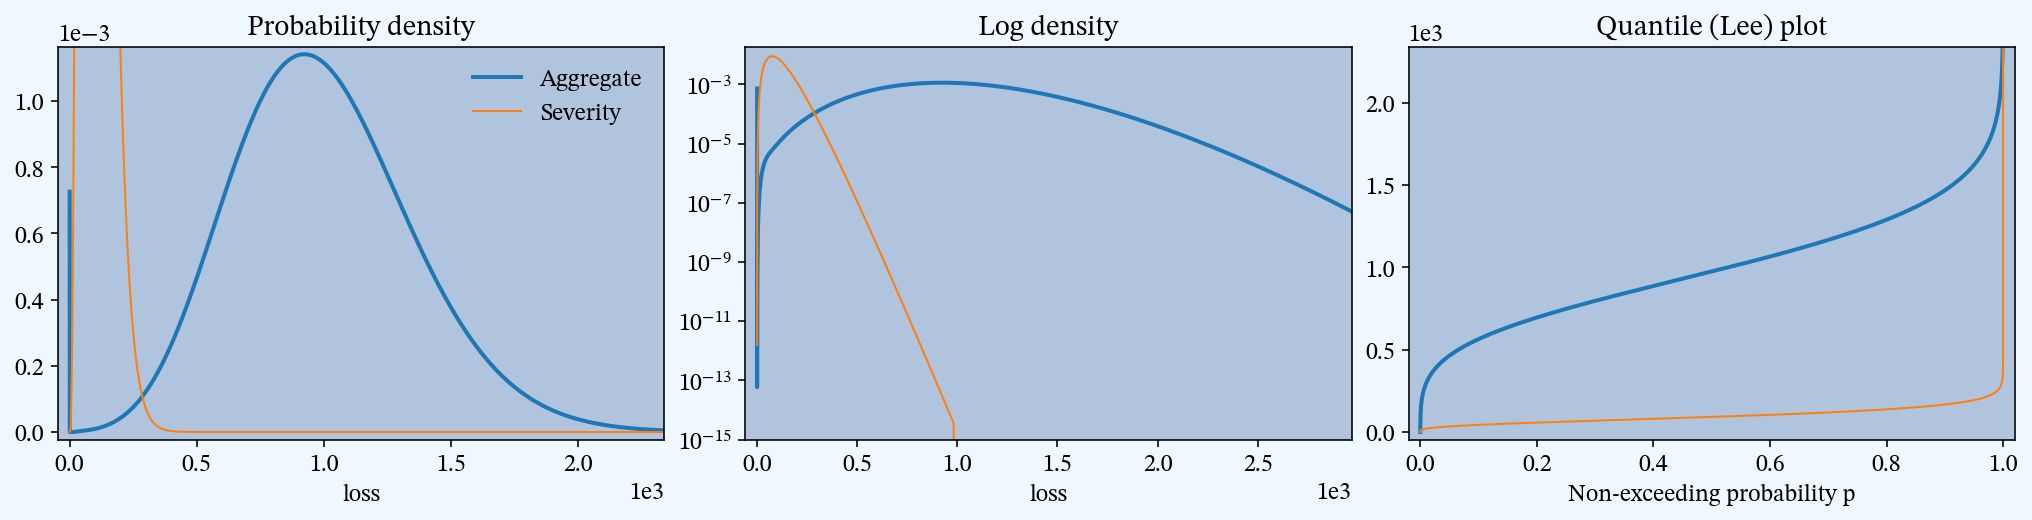

time: 922 ms (started: 2022-10-28 21:19:04 +01:00)


In [11]:
act.plot()

In [14]:
act.density_df.loc[0, 'p'], np.exp(-10)

(4.539992976253098e-05, 4.5399929762484854e-05)

time: 0 ns (started: 2022-10-28 21:19:46 +01:00)


In [16]:
a = 4  # 1/cv**2; Var agg = lambda EX2= lambda beta**2 a(a+1), cv =  sqrt(a+1 / lambda alpha) 
cv = np.sqrt((a+1) / (10 * a)) 
cv

0.3535533905932738

time: 0 ns (started: 2022-10-28 21:21:17 +01:00)


In [18]:
from aggregate.utilities import tweedie_convert

time: 0 ns (started: 2022-10-28 21:22:45 +01:00)


In [32]:
tweedie_convert(λ=10, m=100, cv=0.5) 

μ           1.000k
p            1.200
σ^2         31.399
λ           10.000
α            4.000
β           25.000
tw_cv     353.553m
sev_m      100.000
sev_cv    500.000m
p0         45.400u
dtype: float64

time: 0 ns (started: 2022-10-28 21:26:03 +01:00)


In [27]:
# mean, p, disperson format: 
act2 = build('agg Tw2 tweedie 1000 1.2 31.3985803938698')
act2

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,100.000,100.000,400.572p,500.000m,500.000m,63.030n,1000.000m
Freq,10.000,,,316.228m,,,316.228m
Agg,1000.000,1000.000,-377.842p,353.553m,353.553m,6.547n,424.264m


time: 203 ms (started: 2022-10-28 21:24:02 +01:00)


<AxesSubplot:xlabel='loss'>

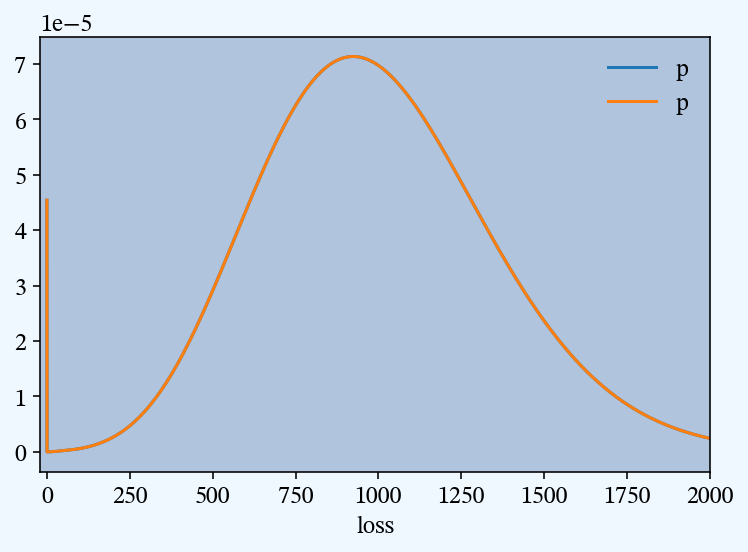

time: 235 ms (started: 2022-10-28 21:25:10 +01:00)


In [31]:
pd.concat((act.density_df.p, act2.density_df.p), axis=1).plot(xlim=[-20, 2000])

In [34]:
welcome(rows=162)

time: 0 ns (started: 2022-10-28 21:30:11 +01:00)


In [35]:
build.knowledge

spec  \
kind name                                                                                                             
agg  A.Basic01                      {'name': 'A.Basic01', 'freq_name': 'empirical', 'freq_a': [1.0], 'freq_b': [...   
     A.Basic02                      {'name': 'A.Basic02', 'freq_name': 'empirical', 'freq_a': [12.0], 'freq_b': ...   
     A.Basic03                      {'name': 'A.Basic03', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...   
     A.Basic04                      {'name': 'A.Basic04', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...   
     A.Basic05                      {'name': 'A.Basic05', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...   
     A.Basic06                      {'name': 'A.Basic06', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3.0], '...   
     A.Basic07                      {'name': 'A.Basic07', 'freq_name': 'empirical', 'freq_a': [0.0, 1.0, 2.0], '...   
     A.Basic08                      {'name': 'A.Basic08', 'freq_name': 'empirical', 'freq_a': [0.0, 1.0, 2.0], '...   
     A.Basic09                      {'name': 'A.Basic09', 'freq_name': 'empirical', 'freq_a': [0.0, 1.0, 2.0], '...   
     B.Freq.Bernoulli               {'name': 'B.Freq.Bernoulli', 'exp_en': 0.8, 'sev_name': 'dhistogram', 'sev_x...   
     B.Freq.Beta                    {'name': 'B.Freq.Beta', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_xs': ...   
     B.Freq.Binomial                {'name': 'B.Freq.Binomial', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_x...   
     B.Freq.Delaporte               {'name': 'B.Freq.Delaporte', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_...   
     B.Freq.Fixed                   {'name': 'B.Freq.Fixed', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_xs':...   
     B.Freq.IG                      {'name': 'B.Freq.IG', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_xs': [1...   
     B.Freq.NegBin                  {'name': 'B.Freq.NegBin', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_xs'...   
     B.Freq.Pascal                  {'name': 'B.Freq.Pascal', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_xs'...   
     B.Freq.Poisson                 {'name': 'B.Freq.Poisson', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_xs...   
     B.Freq.SIG                     {'name': 'B.Freq.SIG', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_xs': [...   
     B.Freq.Sichel                  {'name': 'B.Freq.Sichel', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_xs'...   
     B.Freq.Sichel.gamma            {'name': 'B.Freq.Sichel.gamma', 'exp_en': 10.0, 'sev_name': 'dhistogram', 's...   
     B.Freq.Sichel.ig               {'name': 'B.Freq.Sichel.ig', 'exp_en': 10.0, 'sev_name': 'dhistogram', 'sev_...   
     Basic.Dice.Roll                {'name': 'Basic.Dice.Roll', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3...   
     Basic.Poisson.Dice.Rolls       {'name': 'Basic.Poisson.Dice.Rolls', 'exp_en': 5.0, 'sev_name': 'dhistogram'...   
     Basic.Tweedie                  {'name': 'Basic.Tweedie', 'exp_en': 70.10637160891034, 'freq_name': 'poisson...   
     Basic.Twelve.Dice.Rolls        {'name': 'Basic.Twelve.Dice.Rolls', 'freq_name': 'empirical', 'freq_a': [5.0...   
     C.Sev01                        {'name': 'C.Sev01', 'exp_en': 1.0, 'sev_name': 'expon', 'sev_scale': 100.0, ...   
     C.Sev02                        {'name': 'C.Sev02', 'exp_en': 1.0, 'sev_name': 'expon', 'sev_a': 1.0, 'sev_w...   
     C.Sev03                        {'name': 'C.Sev03', 'exp_en': 1.0, 'sev_name': 'expon', 'sev_scale': 100.0, ...   
     C.Sev04                        {'name': 'C.Sev04', 'exp_en': 1.0, 'sev_name': 'norm', 'sev_scale': 100.0, '...   
     C.Sev05                        {'name': 'C.Sev05', 'exp_en': 1.0, 'sev_name': 'uniform', 'sev_scale': 100.0...   
     C.Sev06                        {'name': 'C.Sev06', 'exp_en': 1.0, 'sev_name': 'gamma', 'sev_a': 0.3, 'sev_w...   
     C.Sev07                        {'name': 'C.Sev07', 'exp_en':

time: 141 ms (started: 2022-10-28 21:30:12 +01:00)


In [3]:
build

time: 0 ns (started: 2022-10-28 22:19:24 +01:00)


In [16]:
from aggregate.utilities import pprint
build.show('^A.*', 'agg', False, False).program.apply(lambda x: pprint(x, html=True));

time: 31 ms (started: 2022-10-28 22:22:55 +01:00)


time: 0 ns (started: 2022-10-28 22:20:42 +01:00)


In [8]:
pprint?

time: 0 ns (started: 2022-10-28 22:20:45 +01:00)


Signature: pprint(txt, split=0, html=False, tacit=False)
Docstring:
Try to format an agg program. This is impractical now - dfreq and dsev, optional
reinsurance, etc. Go for a simple approach of removing unnecessary spacing
and removing notes. Notes can be accessed from the spec that is always to hand.

For long programs use split=60 or so, they are split at appropriate points.

:param txt: program text input
:param tacit: if True pp is silent, else it outputs.
File:      c:\users\steve\documents\cloudstation\telos\python\aggregate_project\aggregate\utilities.py
Type:      function


In [1]:
from aggregate import build

Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


time: 922 ms (started: 2022-10-28 23:20:51 +01:00)


In [27]:
# a = build('agg CAT 1.7 claims sev 1000 * pareto 1.7 - 1700 poisson', update=False, log2=18)
a = build('agg NONCAT 5 claims sev lognorm 100 cv [.4 .8 1 2] wts=4 mixed gamma .4', update=True, log2=18)

time: 1 s (started: 2022-10-28 23:26:42 +01:00)


In [28]:
a

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,100.000,99.730,-2.698m,1.204,1.127,-63.830m,16.834
Freq,5.000,,,600.000m,,,866.667m
Agg,500.000,497.872,-4.257m,806.226m,777.775m,-35.289m,3.198


time: 15 ms (started: 2022-10-28 23:26:44 +01:00)


In [29]:
a.describe

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,100.000,99.730,-2.698m,1.204,1.127,-63.830m,16.834
Freq,5.000,,,600.000m,,,866.667m
Agg,500.000,497.872,-4.257m,806.226m,777.775m,-35.289m,3.198


time: 16 ms (started: 2022-10-28 23:26:46 +01:00)


In [35]:
a.statistics_df.T

,0,1,2,3
name,NONCAT,NONCAT,NONCAT,NONCAT
limit,inf,inf,inf,inf
attachment,0,0,0,0
sevcv_param,400.000m,800.000m,1.000,2.000
el,125.000,125.000,125.000,125.000
prem,0.000,0.000,0.000,0.000
lr,0.000,0.000,0.000,0.000
freq_1,1.250,1.250,1.250,1.250
freq_2,3.062,3.062,3.062,3.062
freq_3,9.678,9.678,9.678,9.678


time: 31 ms (started: 2022-10-28 23:27:23 +01:00)


In [32]:
a.statistics_total_df

,name,limit,attachment,sevcv_param,el,prem,lr,freq_1,freq_2,freq_3,...,sev_cv,sev_skew,agg_1,agg_2,agg_3,agg_m,agg_cv,agg_skew,mix_cv,wt
mixed,NONCAT,inf,0.000,0,500.000,0.000,NaN,5.000,34.000,283.400,...,1.204,16.834,500.000,412.500k,578.266M,500.000,806.226m,3.198,400.000m,1.000
independent,NONCAT,inf,0.000,0,500.000,0.000,NaN,5.000,31.000,223.400,...,1.204,16.834,500.000,382.500k,505.216M,500.000,728.011m,3.762,400.000m,1.000


time: 16 ms (started: 2022-10-28 23:27:03 +01:00)


In [33]:
a.audit_df

,name,limit,attachment,el,freq_1,freq_cv,freq_skew,sev_1,sev_cv,sev_skew,agg_m,agg_cv,agg_skew,emp_sev_1,emp_sev_cv,emp_sev_skew,emp_agg_1,emp_agg_cv,emp_agg_skew
0,NONCAT,inf,0,125.000,1.250,979.796m,1.143,100.000,400.000m,1.264,125.000,1.043,1.318,NaN,NaN,NaN,NaN,NaN,NaN
1,NONCAT,inf,0,125.000,1.250,979.796m,1.143,100.000,800.000m,2.912,125.000,1.213,1.962,NaN,NaN,NaN,NaN,NaN,NaN
2,NONCAT,inf,0,125.000,1.250,979.796m,1.143,100.000,1.000,4.000,125.000,1.327,2.544,NaN,NaN,NaN,NaN,NaN,NaN
3,NONCAT,inf,0,125.000,1.250,979.796m,1.143,100.000,2.000,14.000,125.000,2.040,9.661,NaN,NaN,NaN,NaN,NaN,NaN
mixed,NONCAT,inf,0.000,500.000,5.000,600.000m,866.667m,100.000,1.204,16.834,500.000,806.226m,3.198,99.730,1.127,7.954,497.872,777.775m,1.767


time: 16 ms (started: 2022-10-28 23:27:06 +01:00)


In [34]:
a.report_df

view,0,1,2,3,independent,mixed,empirical,error
statistic,,,,,,,,
name,NONCAT,NONCAT,NONCAT,NONCAT,NONCAT,NONCAT,,
limit,inf,inf,inf,inf,inf,inf,,
attachment,0,0,0,0,0.000,0.000,,
el,125.000,125.000,125.000,125.000,500.000,500.000,,
freq_m,1.250,1.250,1.250,1.250,5.000,5.000,,
freq_cv,979.796m,979.796m,979.796m,979.796m,489.898m,600.000m,,
freq_skew,1.143,1.143,1.143,1.143,571.548m,866.667m,,
sev_m,100.000,100.000,100.000,100.000,100.000,100.000,99.730,-2.698m
sev_cv,400.000m,800.000m,1.000,2.000,1.204,1.204,1.127,-63.830m


time: 16 ms (started: 2022-10-28 23:27:09 +01:00)


In [10]:
a.recommend_bucket(16)

0.0

time: 0 ns (started: 2022-10-28 23:21:07 +01:00)


In [9]:
a

,E(X),CV(X),Skew(X)
X,,,
Sev,728.571,,
Freq,1.700,766.965m,766.965m
Agg,1.239k,,


time: 0 ns (started: 2022-10-28 23:21:01 +01:00)


In [14]:
a.sev_cdf(1000000)

0.9999920796211648

time: 0 ns (started: 2022-10-28 23:22:07 +01:00)


In [15]:
1e6 / 2**18

3.814697265625

time: 0 ns (started: 2022-10-28 23:22:13 +01:00)


In [16]:
a.update(log2=18, bs=4)

time: 125 ms (started: 2022-10-28 23:22:27 +01:00)


In [17]:
a

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,728.571,966.723,326.875m,,6.000,,
Freq,1.700,,,766.965m,,,766.965m
Agg,1.239k,1.643k,326.845m,,4.664,,


time: 16 ms (started: 2022-10-28 23:22:28 +01:00)


In [36]:
a.audit_df

,name,limit,attachment,el,freq_1,freq_cv,freq_skew,sev_1,sev_cv,sev_skew,agg_m,agg_cv,agg_skew,emp_sev_1,emp_sev_cv,emp_sev_skew,emp_agg_1,emp_agg_cv,emp_agg_skew
0,NONCAT,inf,0,125.000,1.250,979.796m,1.143,100.000,400.000m,1.264,125.000,1.043,1.318,NaN,NaN,NaN,NaN,NaN,NaN
1,NONCAT,inf,0,125.000,1.250,979.796m,1.143,100.000,800.000m,2.912,125.000,1.213,1.962,NaN,NaN,NaN,NaN,NaN,NaN
2,NONCAT,inf,0,125.000,1.250,979.796m,1.143,100.000,1.000,4.000,125.000,1.327,2.544,NaN,NaN,NaN,NaN,NaN,NaN
3,NONCAT,inf,0,125.000,1.250,979.796m,1.143,100.000,2.000,14.000,125.000,2.040,9.661,NaN,NaN,NaN,NaN,NaN,NaN
mixed,NONCAT,inf,0.000,500.000,5.000,600.000m,866.667m,100.000,1.204,16.834,500.000,806.226m,3.198,99.730,1.127,7.954,497.872,777.775m,1.767


time: 32 ms (started: 2022-10-28 23:28:03 +01:00)


In [48]:
df = a.audit_df.copy()

time: 0 ns (started: 2022-10-28 23:30:33 +01:00)


In [49]:
df.columns = df.columns.str.split('_', n=2, expand=True)

AttributeError: 'MultiIndex' object has no attribute 'replace'

time: 15 ms (started: 2022-10-28 23:30:33 +01:00)


In [46]:
df

name limit attachment       el   freq                          sev  \
          NaN   NaN        NaN      NaN      1        cv      skew        1   
          NaN   NaN        NaN      NaN    NaN       NaN       NaN      NaN   
0      NONCAT   inf          0  125.000  1.250  979.796m     1.143  100.000   
1      NONCAT   inf          0  125.000  1.250  979.796m     1.143  100.000   
2      NONCAT   inf          0  125.000  1.250  979.796m     1.143  100.000   
3      NONCAT   inf          0  125.000  1.250  979.796m     1.143  100.000   
mixed  NONCAT   inf      0.000  500.000  5.000  600.000m  866.667m  100.000   

                             agg                      emp                \
             cv    skew        m        cv   skew     sev                 
            NaN     NaN      NaN       NaN    NaN       1     cv   skew   
0      400.000m   1.264  125.000     1.043  1.318     NaN    NaN    NaN   
1      800.000m   2.912  125.000     1.213  1.962     NaN    NaN    NaN   
2         1.000   4.000  125.000     1.327  2.544     NaN    NaN    NaN   
3         2.000  14.000  125.000     2.040  9.661     NaN    NaN    NaN   
mixed     1.204  16.834  500.000  806.226m  3.198  99.730  1.127  7.954   

                                 
           agg                   
             1        cv   skew  
0          NaN       NaN    NaN  
1          NaN       NaN    NaN  
2          NaN       NaN    NaN  
3          NaN       NaN    NaN  
mixed  497.872  777.775m  1.767

time: 32 ms (started: 2022-10-28 23:29:58 +01:00)


In [47]:
df.replace(np.nan, '')

name limit attachment       el   freq                          sev  \
          NaN   NaN        NaN      NaN      1        cv      skew        1   
          NaN   NaN        NaN      NaN    NaN       NaN       NaN      NaN   
0      NONCAT   inf          0  125.000  1.250  979.796m     1.143  100.000   
1      NONCAT   inf          0  125.000  1.250  979.796m     1.143  100.000   
2      NONCAT   inf          0  125.000  1.250  979.796m     1.143  100.000   
3      NONCAT   inf          0  125.000  1.250  979.796m     1.143  100.000   
mixed  NONCAT   inf      0.000  500.000  5.000  600.000m  866.667m  100.000   

                             agg                      emp                \
             cv    skew        m        cv   skew     sev                 
            NaN     NaN      NaN       NaN    NaN       1     cv   skew   
0      400.000m   1.264  125.000     1.043  1.318                         
1      800.000m   2.912  125.000     1.213  1.962                         
2         1.000   4.000  125.000     1.327  2.544                         
3         2.000  14.000  125.000     2.040  9.661                         
mixed     1.204  16.834  500.000  806.226m  3.198  99.730  1.127  7.954   

                                 
           agg                   
             1        cv   skew  
0                                
1                                
2                                
3                                
mixed  497.872  777.775m  1.767

time: 31 ms (started: 2022-10-28 23:30:19 +01:00)


# Catastrophe Modelers

1851-2017

| Category | Count | Frequency |
|:---------|------:|----------:|
| 1        |   116 |      0.69 |
| 2        |    75 |      0.45 |
| 3        |    76 |      0.46 |
| 4        |    20 |      0.12 |
| 5        |     3 |      0.02 |

Overall severity from RMI course lognormal (19.6, 2.58)

In [2]:
from aggregate import build

Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


time: 859 ms (started: 2022-10-31 08:25:37 +00:00)


In [14]:
2e10 / 2**18, np.exp(19.8 + 2.58**2/2), np.log(1e9), np.array([19.0, 19.2, 19.4, 19.6, 19.8]) - np.log(1e9)

(76293.9453125,
 11077700936.174833,
 20.72326583694641,
 array([   -1.7233,    -1.5233,    -1.3233,    -1.1233,   -0.92327]))

time: 0 ns (started: 2022-10-31 08:28:18 +00:00)


In [ ]:
2**8

In [29]:
import scipy.stats as ss 

time: 0 ns (started: 2022-10-31 08:32:29 +00:00)


In [106]:
mu = -1
sig = 2.58
fz = ss.lognorm(sig, scale=np.exp(mu))
m, v = fz.stats()
m = float(m)
v = float(v)
m, v, np.exp(mu + sig**2/2), v + m**2, np.exp(2*mu + 2*sig**2), np.exp(3*mu + 9*sig**2/2)

(10.259457878563591,
 81757.54727325412,
 10.259457878563591,
 81862.80374921614,
 81862.80374921614,
 508026780167.2133)

time: 0 ns (started: 2022-10-31 10:30:03 +00:00)


In [35]:
from scipy.integrate import quad

time: 0 ns (started: 2022-10-31 08:33:48 +00:00)


In [89]:
argkw = dict(limit=1000, epsabs=1e-6, epsrel=1e-6, full_output=1)
a, e, m = quad(lambda x: fz.isf(x) ** 2, 2**-52, 1, **argkw)
a, e, m['last']

(81739.89831266736, 0.08106761600541032, 272)

time: 1.06 s (started: 2022-10-31 10:18:26 +00:00)


In [94]:
a, e, *m = quadx(lambda x: fz.isf(x) ** 2, 2**-52, 1, **argkw)

time: 3.75 s (started: 2022-10-31 10:21:43 +00:00)


In [110]:
argkw = dict(limit=1000, epsabs=1e-6, epsrel=1e-8, full_output=1)
a, e1, *r1 = quad(lambda x: 3 * x**2 * fz.sf(x), 0, np.inf, **argkw)
argkw = dict(limit=1000, epsabs=1e-6, epsrel=1e-8, full_output=1)
b_basic, e, *r = quad(lambda x: fz.isf(x) ** 3, 2**-52, 1, **argkw)
b0, e, *r = quad(lambda x: fz.isf(x) ** 3, 2**-52, 1, **argkw, points=[1e-17, 1e-14, 1e-10, 1e-6, 1e-4])

# b, e, *r = quad(lambda x: fz.isf(x) ** 3, 2e-16, 1e-4, **argkw)
# c, e, *r = quad(lambda x: fz.isf(x) ** 3, 1e-4, 1, **argkw)

b, e, *r = quad(lambda x:  3 * x**2 * fz.sf(x), 0, 30, **argkw)
print(e, r[0]['last'])
c, e, *r = quad(lambda x:  3 * x**2 * fz.sf(x), 30, np.inf, **argkw)
print(e, r[0]['last'])

1.3794029480764073e-05 4
514080585538.3105 28
time: 3.31 s (started: 2022-10-31 10:32:40 +00:00)


In [111]:
pd.Series({'ex2 exact': np.exp(3*mu + 9*sig**2/2), # v+m**2, 
           'x S': a, 
           'x S err': e,
           'x S iter': r1[0]['last'],
           'isf': b_basic, 
           'isf with points': b0, 
           'isf split at 1e-4': np.array(b) + np.array(c)
          }
           ).to_frame()
           

,0
ex2 exact,508.027G
x S,323.121G
x S err,514.081G
x S iter,28.000
isf,4.782G
isf with points,330.766G
isf split at 1e-4,323.121G


time: 0 ns (started: 2022-10-31 10:32:51 +00:00)


In [100]:
a, b_basic

(81862.80374771768, 81739.89478260736)

time: 0 ns (started: 2022-10-31 10:22:43 +00:00)


In [69]:
# actual answer for ex2: logX2 = 2 logX has 2mu 2sigma, mean exp(2mu + 2sig^2)
np.exp



2.220446049250313e-16

time: 0 ns (started: 2022-10-31 09:54:50 +00:00)


In [1]:
from aggregate import build

Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


time: 875 ms (started: 2022-10-31 10:41:55 +00:00)


In [6]:
np.exp(19.8) / 1e9

0.3972196658050841

time: 0 ns (started: 2022-10-31 10:44:33 +00:00)


In [38]:
cat = build('agg USWind [0.69 0.45 0.45 0.12 0.02] claims sev [exp(-1.7233),    exp(-1.5233),    exp(-1.3233),    exp(-1.1233),   exp(-0.92327)] * lognorm [2.18 2.28 2.38 2.45 2.58] poisson '
            'aggregate ceded to 50 x 0 and 50 x 50 and 100 x 100 and 100 x 200 and 100 x 300 and 100 x 400 and 500 x 500 and 1e4 x 1000 '
            'note{losses in billions}', 
            log2=18, bs=1/2**4, normalize=False)

line 3126|WARNING   | aggregate.distributions.safe_integrate|  level = 1, error=5.315844506803558e-07
line 3126|WARNING   | aggregate.distributions.safe_integrate|  level = 2, error=2.9345179692532894e-07
line 3126|WARNING   | aggregate.distributions.safe_integrate|  level = 3, error=5.18321547619016e-07
line  854|ERROR     | aggregate.utilities.static_moments_to_mcvsk|  MomentAggregator.static_moments_to_mcvsk | weird var < 0 = -2.814327586922502; ex=1.9211039561922785, ex2=0.8763128235751215
line 3126|WARNING   | aggregate.distributions.safe_integrate|  level = 1, error=1.728943211709577e-06
line 3126|WARNING   | aggregate.distributions.safe_integrate|  level = 2, error=6.225555021765406e-07
line 3126|WARNING   | aggregate.distributions.safe_integrate|  level = 3, error=2.0895287850799868e-07
line  854|ERROR     | aggregate.utilities.static_moments_to_mcvsk|  MomentAggregator.static_moments_to_mcvsk | weird var < 0 = -6.635484747452669; ex=2.9326310731374408, ex2=1.9648402636785887
l

time: 1.05 s (started: 2022-10-31 11:06:08 +00:00)


In [39]:
cat

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.287,3.248,-11.735m,,12.391,,
Freq,1.730,,,760.286m,,,760.286m
Agg,5.686,5.637,-8.717m,397.865m,9.614,23.163,418.101m


time: 16 ms (started: 2022-10-31 11:06:10 +00:00)


In [40]:
cat.reinsurance_description(), cat.reinsurance_kinds()

('Reinsurance: ceded to 50.00 xs 0.00 and 50.00 xs 50.00 and 100.00 xs 100.00 and 100.00 xs 200.00 and 100.00 xs 300.00 and 100.00 xs 400.00 and 500.00 xs 500.00 and 10,000.00 xs 1,000.00 in the aggregate.',
 'Aggregate only')

time: 0 ns (started: 2022-10-31 11:06:13 +00:00)


In [42]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', 15, 'display.float_format', lambda x: f'{x:,.3f}', 'display.multi_sparse', False):
    display(cat.reins_audit_df)

,,,,ceded,ceded,ceded,ceded,ceded,net,net,net,net,net,subject,subject,subject,subject,subject
,,,,ex,var,sd,cv,skew,ex,var,sd,cv,skew,ex,var,sd,cv,skew
kind,share,limit,attach,,,,,,,,,,,,,,,
agg,50.0,50.000,0.0,2.083,43.171,6.570,3.154,5.500,1.184,"1,778.302",42.170,35.608,175.374,3.248,"1,620.219",40.252,12.391,126.666
agg,50.0,50.000,50.0,0.312,13.364,3.656,11.733,12.590,2.956,"1,805.016",42.485,14.373,171.384,3.248,"1,620.219",40.252,12.391,126.666
agg,100.0,100.000,100.0,0.265,22.479,4.741,17.921,19.430,3.003,"1,739.538",41.708,13.889,177.635,3.248,"1,620.219",40.252,12.391,126.666
agg,100.0,100.000,200.0,0.129,11.718,3.423,26.478,27.790,3.138,"1,776.577",42.149,13.431,172.205,3.248,"1,620.219",40.252,12.391,126.666
agg,100.0,100.000,300.0,0.080,7.449,2.729,34.119,35.335,3.188,"1,800.262",42.429,13.311,168.928,3.248,"1,620.219",40.252,12.391,126.666
agg,100.0,100.000,400.0,0.055,5.243,2.290,41.285,42.442,3.212,"1,817.032",42.627,13.271,166.704,3.248,"1,620.219",40.252,12.391,126.666
agg,500.0,500.000,500.0,0.138,56.924,7.545,54.705,60.410,3.130,"1,535.514",39.186,12.521,186.775,3.248,"1,620.219",40.252,12.391,126.666
agg,10000.0,"10,000.000",1000.0,0.196,774.424,27.828,141.845,239.897,3.071,583.707,24.160,7.866,49.454,3.248,"1,620.219",40.252,12.391,126.666


time: 1.52 s (started: 2022-10-31 11:06:20 +00:00)


In [43]:
cat

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.287,3.248,-11.735m,,12.391,,
Freq,1.730,,,760.286m,,,760.286m
Agg,5.686,5.637,-8.717m,397.865m,9.614,23.163,418.101m


time: 16 ms (started: 2022-10-31 11:06:22 +00:00)


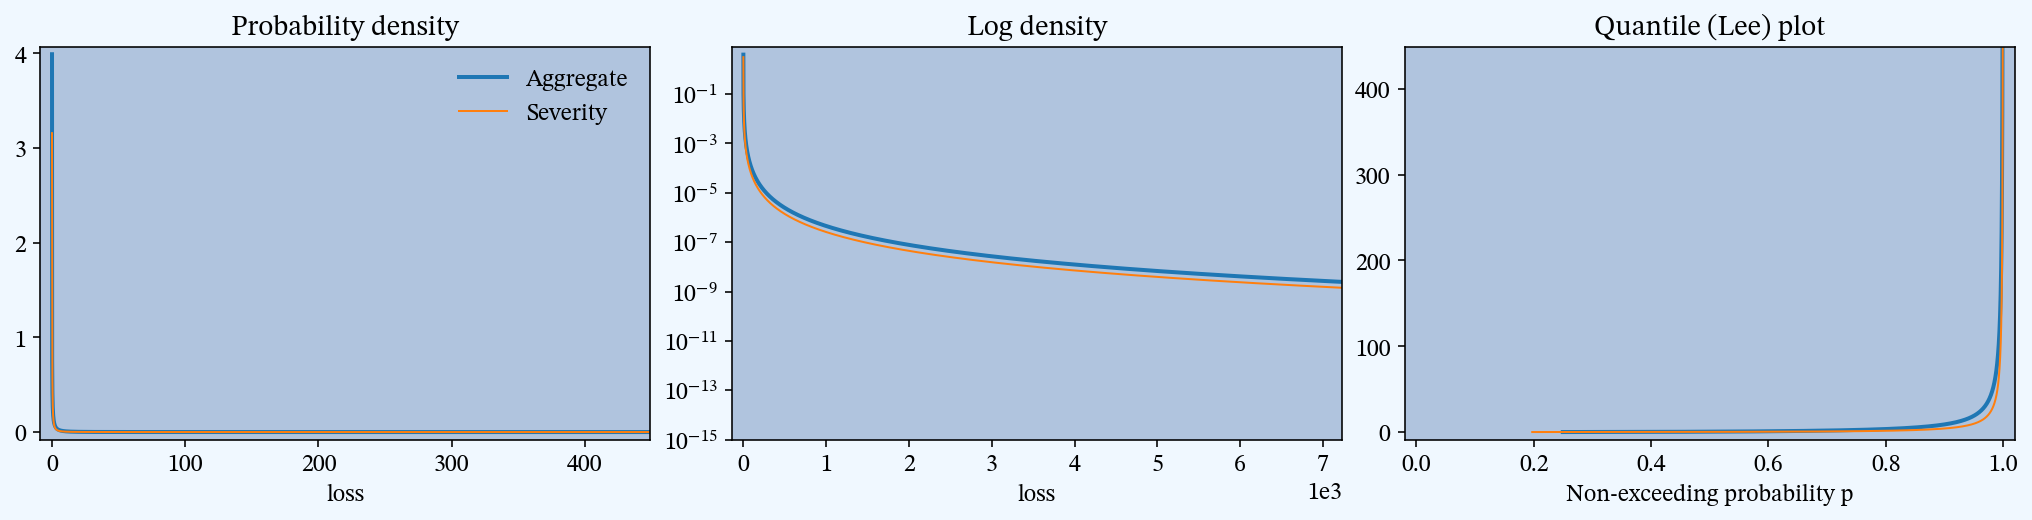

time: 2.09 s (started: 2022-10-31 10:42:50 +00:00)


In [4]:
cat.plot()

In [9]:
cat.q(0.99)

80.0

time: 15 ms (started: 2022-10-31 10:46:03 +00:00)


In [7]:
cat.audit_df.T

,0,1,2,3,4,mixed
name,USWind,USWind,USWind,USWind,USWind,USWind
limit,inf,inf,inf,inf,inf,inf
attachment,0,0,0,0,0,0.000
el,1.326,1.320,2.035,784.810m,221.553m,5.686
freq_1,690.000m,450.000m,450.000m,120.000m,20.000m,1.730
freq_cv,1.204,1.491,1.491,2.887,7.071,760.286m
freq_skew,1.204,1.491,1.491,2.887,7.071,760.286m
sev_1,1.921,2.933,4.522,6.540,11.078,3.287
sev_cv,NaN,NaN,NaN,NaN,NaN,NaN
sev_skew,NaN,NaN,NaN,NaN,NaN,NaN


time: 15 ms (started: 2022-10-31 10:44:51 +00:00)


In [8]:
cat.report_df

view,0,1,2,3,4,independent,mixed,empirical,error
statistic,,,,,,,,,
name,USWind,USWind,USWind,USWind,USWind,USWind,USWind,,
limit,inf,inf,inf,inf,inf,inf,inf,,
attachment,0,0,0,0,0,0.000,0.000,,
el,1.326,1.320,2.035,784.810m,221.553m,5.686,5.686,,
freq_m,690.000m,450.000m,450.000m,120.000m,20.000m,1.730,1.730,,
freq_cv,1.204,1.491,1.491,2.887,7.071,760.286m,760.286m,,
freq_skew,1.204,1.491,1.491,2.887,7.071,760.286m,760.286m,,
sev_m,1.921,2.933,4.522,6.540,11.078,3.287,3.287,3.248,-11.735m
sev_cv,,,,,,,,12.391,


time: 31 ms (started: 2022-10-31 10:44:54 +00:00)


# Reinsurance: check!

In [4]:
from aggregate import build
from aggregate.utilities import make_ceder_netter
opt = ('display.float_format', lambda x: f'{x:,.3f}', 'display.multi_sparse', False)

time: 0 ns (started: 2022-10-31 12:14:51 +00:00)


In [2]:
reins_list = [(1.0, 10.0, 0.0), (1.0, 10.0, 10.0), (1.0, 10.0, 20.0), (1.0, 10.0, 30.0), (1.0, 10.0, 40.0), (1.0, np.inf, 50.0)]
test = build('agg TEST 5 claims dsev [1:100] poisson', bs=1, update=True)
reins_list

time: 16 ms (started: 2022-10-31 12:12:38 +00:00)


In [10]:
test = build('agg TEST 5 claims dsev [0:100] occurrence ceded to tower [10:50:10] poisson', bs=1, update=True)

display(test)
# print(test.spec)

with pd.option_context(*opt):
    display(test.reins_audit_df)

line 1309|WARNING   | aggregate.distributions._apply_reins_work|  Only one net value at 0.0 with prob = 1.0


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,50.000,50.000,-888.178a,583.095m,583.095m,222.045a,2.349f
Freq,5.000,,,447.214m,,,447.214m
Agg,250.000,250.000,-2.887f,517.687m,517.687m,-76.161f,582.384m


,,,,ceded,ceded,ceded,ceded,ceded,net,net,net,net,net,subject,subject,subject,subject,subject
,,,,ex,var,sd,cv,skew,ex,var,sd,cv,skew,ex,var,sd,cv,skew
kind,share,limit,attach,,,,,,,,,,,,,,,
occ,1.0,10.000,0.0,9.455,3.515,1.875,0.198,-3.648,40.545,802.327,28.325,0.699,0.079,50.000,850.000,29.155,0.583,0.000
occ,1.0,10.000,10.0,8.465,11.358,3.370,0.398,-1.909,41.535,730.962,27.036,0.651,0.172,50.000,850.000,29.155,0.583,0.000
occ,1.0,10.000,20.0,7.475,17.239,4.152,0.555,-1.136,42.525,677.438,26.028,0.612,0.198,50.000,850.000,29.155,0.583,0.000
occ,1.0,10.000,30.0,6.485,21.161,4.600,0.709,-0.621,43.515,641.755,25.333,0.582,0.156,50.000,850.000,29.155,0.583,0.000
occ,1.0,10.000,40.0,5.495,23.121,4.808,0.875,-0.199,44.505,623.913,24.978,0.561,0.059,50.000,850.000,29.155,0.583,0.000
occ,1.0,inf,50.0,12.624,265.641,16.298,1.291,0.929,37.376,265.641,16.298,0.436,-0.929,50.000,850.000,29.155,0.583,0.000
occ,all,inf,gup,50.000,850.000,29.155,0.583,0.000,0.000,0.000,0.000,NaN,NaN,50.000,850.000,29.155,0.583,0.000


time: 172 ms (started: 2022-10-31 12:49:35 +00:00)


In [20]:
testa.spec

{'name': 'TESTA',
 'exp_el': 0,
 'exp_premium': 0,
 'exp_lr': 0,
 'exp_en': 5.0,
 'exp_attachment': 0,
 'exp_limit': inf,
 'sev_name': 'dhistogram',
 'sev_a': nan,
 'sev_b': 0,
 'sev_mean': 0,
 'sev_cv': 0,
 'sev_loc': 0,
 'sev_scale': 0,
 'sev_xs': array([         0,          1,          2,          3,          4,          5,          6,          7,          8,          9,         10,         11,         12,         13,         14,         15,
                16,         17,         18,         19,         20,         21,         22,         23,         24,         25,         26,         27,         28,         29,         30,         31,
                32,         33,         34,         35,         36,         37,         38,         39,         40,         41,         42,         43,         44,         45,         46,         47,
                48,         49,         50,         51,         52,         53,         54,         55,         56,         57,         58,         59,

time: 15 ms (started: 2022-10-31 16:41:44 +00:00)


In [12]:
5e6 / 2**18

19.073486328125

time: 15 ms (started: 2022-10-31 21:14:39 +00:00)


In [14]:
np.exp(2.5**2/2)

22.75989509352673

time: 16 ms (started: 2022-10-31 21:15:24 +00:00)


In [15]:
bahnemann = build('agg Bahn 1 claim sev 50 * lognorm 2.5 occurrence ceded to tower [100 200 500 1000 2000 3000 4000 5000] fixed', log2=18, bs=25)
with pd.option_context('display.max_rows', 100, 'display.max_columns', 15, 'display.float_format', lambda x: f'{x:,.3f}', 'display.multi_sparse', False):
    display(bahnemann)
    display(bahnemann.reins_audit_df)


line 3148|WARNING   | aggregate.distributions.safe_integrate|  level = 1, error=0.000741042200843367
line 3148|WARNING   | aggregate.distributions.safe_integrate|  level = 2, error=0.16257393942214549
line 3148|WARNING   | aggregate.distributions.safe_integrate|  level = 3, error=12.501687481525565
line  905|ERROR     | aggregate.utilities.static_moments_to_mcvsk|  MomentAggregator.static_moments_to_mcvsk | weird var < 0 = -1022031.0660020425; ex=1137.9947562072296, ex2=273000.9991531093
line  905|ERROR     | aggregate.utilities.static_moments_to_mcvsk|  MomentAggregator.static_moments_to_mcvsk | weird var < 0 = -1022031.0660020425; ex=1137.9947562072296, ex2=273000.9991531093
line  905|ERROR     | aggregate.utilities.static_moments_to_mcvsk|  MomentAggregator.static_moments_to_mcvsk | weird var < 0 = -1022031.0660020425; ex=1137.9947562072296, ex2=273000.9991531093
line  905|ERROR     | aggregate.utilities.static_moments_to_mcvsk|  MomentAggregator.static_moments_to_mcvsk | weird var 

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,"1,137.995","1,121.963",-0.014,,14.330,,
Freq,1.000,,,0.000,,,
Agg,"1,137.995","1,121.963",-0.014,,14.330,,


,,,,ceded,ceded,ceded,ceded,ceded,net,net,net,net,net,subject,subject,subject,subject,subject
,,,,ex,var,sd,cv,skew,ex,var,sd,cv,skew,ex,var,sd,cv,skew
kind,share,limit,attach,,,,,,,,,,,,,,,
occ,1.0,100.000,0.0,53.302,"1,877.713",43.333,0.813,-0.063,"1,068.662","258,396,623.034","16,074.720",15.042,131.128,"1,121.963","258,498,311.109","16,077.883",14.330,131.059
occ,1.0,100.000,100.0,33.321,"2,067.336",45.468,1.365,0.711,"1,088.642","258,355,060.627","16,073.427",14.765,131.156,"1,121.963","258,498,311.109","16,077.883",14.330,131.059
occ,1.0,300.000,200.0,66.958,"14,013.929",118.380,1.768,1.340,"1,055.006","258,017,764.861","16,062.931",15.225,131.382,"1,121.963","258,498,311.109","16,077.883",14.330,131.059
occ,1.0,500.000,500.0,70.904,"27,869.874",166.943,2.354,2.061,"1,051.059","257,651,106.133","16,051.514",15.272,131.626,"1,121.963","258,498,311.109","16,077.883",14.330,131.059
occ,1.0,"1,000.000",1000.0,88.733,"73,524.751",271.154,3.056,2.901,"1,033.230","256,813,192.163","16,025.392",15.510,132.181,"1,121.963","258,498,311.109","16,077.883",14.330,131.059
occ,1.0,"1,000.000",2000.0,59.330,"52,632.108",229.417,3.867,3.734,"1,062.633","256,835,619.664","16,026.092",15.081,132.158,"1,121.963","258,498,311.109","16,077.883",14.330,131.059
occ,1.0,"1,000.000",3000.0,44.838,"41,019.368",202.532,4.517,4.401,"1,077.125","256,875,700.512","16,027.342",14.880,132.124,"1,121.963","258,498,311.109","16,077.883",14.330,131.059
occ,1.0,"1,000.000",4000.0,36.048,"33,572.470",183.228,5.083,4.979,"1,085.916","256,917,587.074","16,028.649",14.760,132.090,"1,121.963","258,498,311.109","16,077.883",14.330,131.059


time: 2.17 s (started: 2022-10-31 21:15:40 +00:00)


In [9]:
# testo = build('agg TESTO 5 claims dsev [0:100] poisson aggregate ceded to tower [0:1000:100]', bs=1)
testo = build('agg TESTO 5 claims dsev [0:100] poisson aggregate net of 50 po 100 x 100', bs=1)
# testo = build('agg TESTO 5 claims dsev [0:100] occurrence ceded to tower [25 50 75 100] poisson', bs=1)

display(testo)

print(testo.spec['occ_reins'], \
testo.spec['agg_reins'])

with pd.option_context('display.max_rows', 100, 'display.max_columns', 15, 'display.float_format', lambda x: f'{x:,.3f}', 'display.multi_sparse', False):
    display(testo.reins_audit_df)
    display(testo.audit_df.T)
    display(testo.report_df)

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,50.000,50.000,-888.178a,583.095m,583.095m,222.045a,2.349f
Freq,5.000,,,447.214m,,,447.214m
Agg,250.000,212.036,-151.858m,517.687m,547.699m,57.973m,582.384m


None [(0.5, 100.0, 100.0)]


,,,,ceded,ceded,ceded,ceded,ceded,net,net,net,net,net,subject,subject,subject,subject,subject
,,,,ex,var,sd,cv,skew,ex,var,sd,cv,skew,ex,var,sd,cv,skew
kind,share,limit,attach,,,,,,,,,,,,,,,
agg,0.5,100.000,100.0,38.099,340.487,18.452,0.484,-1.206,212.036,"13,486.577",116.132,0.548,0.924,250.000,"16,750.000",129.422,0.518,0.582
agg,all,inf,gup,38.099,340.487,18.452,0.484,-1.206,212.036,"13,486.577",116.132,0.548,0.924,250.000,"16,750.000",129.422,0.518,0.582


,0,mixed
name,TESTO,TESTO
limit,inf,inf
attachment,0,0.000
el,250.000,250.000
freq_1,5.000,5.000
freq_cv,0.447,0.447
freq_skew,0.447,0.447
sev_1,50.000,50.000
sev_cv,0.583,0.583
sev_skew,0.000,0.000


view,0,independent,mixed,empirical,error
statistic,,,,,
name,TESTO,TESTO,TESTO,,
limit,inf,inf,inf,,
attachment,0,0.000,0.000,,
el,250.000,250.000,250.000,,
freq_m,5.000,5.000,5.000,,
freq_cv,0.447,0.447,0.447,,
freq_skew,0.447,0.447,0.447,,
sev_m,50.000,50.000,50.000,50.000,-0.000
sev_cv,0.583,0.583,0.583,0.583,0.000


time: 109 ms (started: 2022-10-31 21:12:03 +00:00)


In [1]:
from aggregate import build

Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


time: 859 ms (started: 2022-10-31 21:08:05 +00:00)


In [3]:
# testa = build('agg TESTA 5 claims dsev [0:100] poisson aggregate ceded to tower [0:1000:100]', bs=1)
testa = build('agg TESTA 5 claims dsev [0:100] poisson aggregate ceded to 100 x 50', bs=1)
# testa = build('agg TESTA 5 claims dsev [0:100] poisson aggregate ceded to tower [100 200]', bs=1, log_level=20)

display(testa)

print(testa.spec['occ_reins'], \
testa.spec['agg_reins'])

with pd.option_context('display.max_rows', 100, 'display.max_columns', 15, 'display.float_format', lambda x: f'{x:,.3f}', 'display.multi_sparse', False):
    display(testa.reins_audit_df)

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,50.000,50.000,-888.178a,583.095m,583.095m,222.045a,2.349f
Freq,5.000,,,447.214m,,,447.214m
Agg,250.000,87.866,-648.537m,517.687m,308.668m,-403.755m,582.384m


None [(1.0, 100.0, 50.0)]


,,,,ceded,ceded,ceded,ceded,ceded,net,net,net,net,net,subject,subject,subject,subject,subject
,,,,ex,var,sd,cv,skew,ex,var,sd,cv,skew,ex,var,sd,cv,skew
kind,share,limit,attach,,,,,,,,,,,,,,,
agg,1.0,100.000,50.0,87.866,735.570,27.121,0.309,-2.235,162.134,"13,095.020",114.433,0.706,1.059,250.000,"16,750.000",129.422,0.518,0.582
agg,all,inf,gup,87.866,735.570,27.121,0.309,-2.235,162.134,"13,095.020",114.433,0.706,1.059,250.000,"16,750.000",129.422,0.518,0.582


time: 109 ms (started: 2022-10-31 21:09:36 +00:00)


In [32]:
testo.report_df.T

statistic,name,limit,attachment,el,freq_m,freq_cv,freq_skew,sev_m,sev_cv,sev_skew,agg_m,agg_cv,agg_skew
view,,,,,,,,,,,,,
0,TESTO,inf,0,250.000,5.000,447.214m,447.214m,50.000,583.095m,1.174f,250.000,517.687m,582.384m
independent,TESTO,inf,0.000,250.000,5.000,447.214m,447.214m,50.000,583.095m,2.349f,250.000,517.687m,582.384m
mixed,TESTO,inf,0.000,250.000,5.000,447.214m,447.214m,50.000,583.095m,2.349f,250.000,517.687m,582.384m
empirical,,,,,,,,50.000,583.095m,0.000,250.000,517.687m,582.384m
error,,,,,,,,-888.178a,222.045a,-1.000,-2.887f,-76.161f,-10.106p


time: 16 ms (started: 2022-10-31 17:59:27 +00:00)


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,50.000,50.000,-888.178a,583.095m,583.095m,222.045a,2.349f
Freq,5.000,,,447.214m,,,447.214m
Agg,250.000,249.994,-23.025u,517.687m,517.648m,-75.398u,582.384m


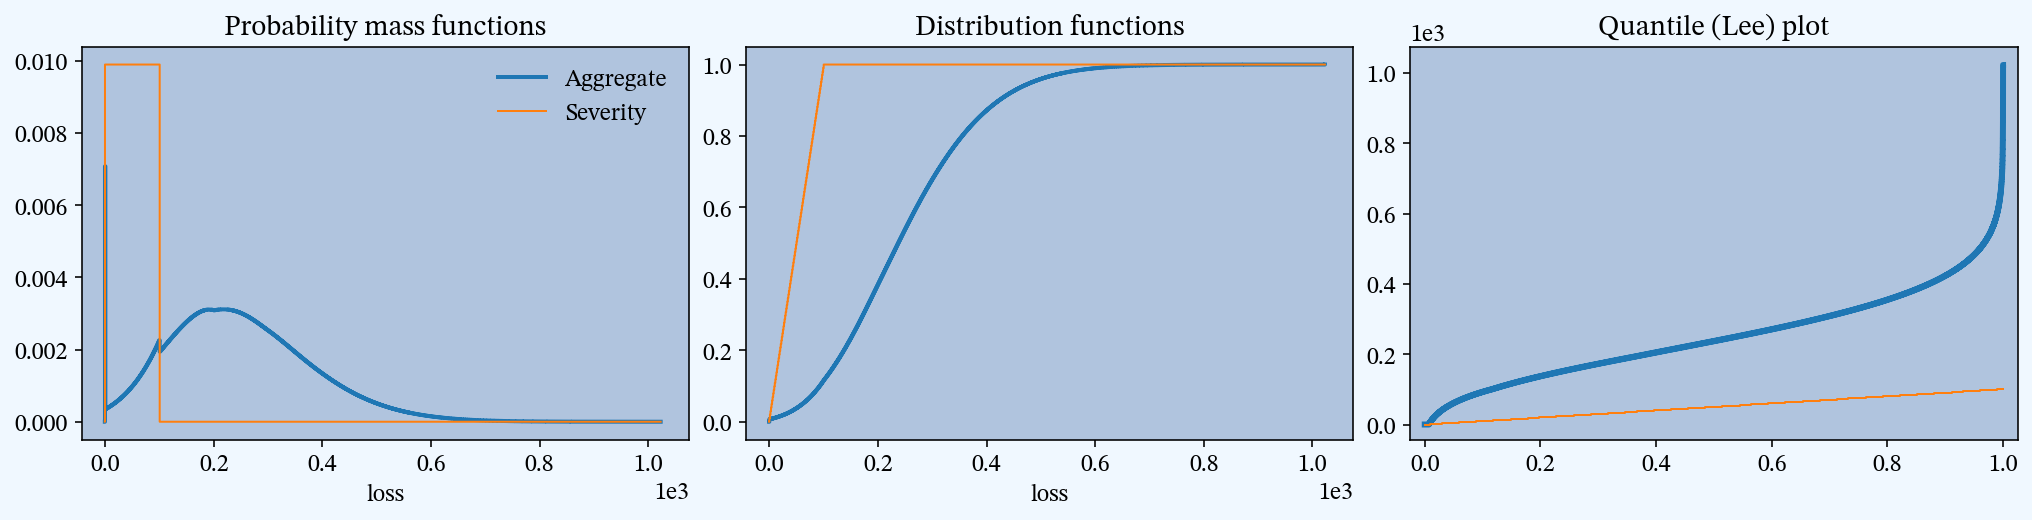

time: 515 ms (started: 2022-10-31 12:53:56 +00:00)


In [13]:
testg = build('agg TESTG 5 claims dsev [0:100] poisson', bs=1, log2=10)

display(testg)

testg.plot()

In [17]:
testg.q(1)

1023.0

time: 0 ns (started: 2022-10-31 16:38:22 +00:00)


In [23]:
testg.density_df.loc[100, 'lev']

95.43606670653017

time: 0 ns (started: 2022-10-31 17:46:04 +00:00)


In [29]:
testg.density_df[['loss', 'p_total']].to_csv('\\temp\\aggloss.csv')

time: 16 ms (started: 2022-10-31 17:55:19 +00:00)


In [4]:
fz = ss.lognorm(2.5, scale=50)
m, v, sk = fz.stats('mvs')
m, np.exp(2.5**2/2) * 50, v + m*m

(array(      1138), 1137.9947546763365, 670843216.302186)

time: 16 ms (started: 2022-11-01 08:38:46 +00:00)


In [6]:
import scipy.integrate as si

time: 0 ns (started: 2022-11-01 10:09:37 +00:00)


In [7]:
si?

time: 0 ns (started: 2022-11-01 10:09:39 +00:00)


Type:        module
String form: <module 'scipy.integrate' from 'C:\\Users\\steve\\miniconda3\\envs\\smve38\\lib\\site-packages\\scipy\\integrate\\__init__.py'>
File:        c:\users\steve\miniconda3\envs\smve38\lib\site-packages\scipy\integrate\__init__.py
Docstring:  
Integration and ODEs (:mod:`scipy.integrate`)

.. currentmodule:: scipy.integrate

Integrating functions, given function object

.. autosummary::
   :toctree: generated/

   quad          -- General purpose integration
   quad_vec      -- General purpose integration of vector-valued functions
   dblquad       -- General purpose double integration
   tplquad       -- General purpose triple integration
   nquad         -- General purpose N-D integration
   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
   quadrature    -- Integrate with given tolerance using Gaussian quadrature
   romberg       -- Integrate func using Romberg integration
   quad_explain  -- Print information for use of quad
   new

In [ ]:
   quad          -- General purpose integration
   quad_vec      -- General purpose integration of vector-valued functions
   dblquad       -- General purpose double integration
   tplquad       -- General purpose triple integration
   nquad         -- General purpose N-D integration
   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
   quadrature    -- Integrate with given tolerance using Gaussian quadrature
   romberg       -- Integrate func using Romberg integration

In [8]:
from aggregate import Severity, logger_level
import scipy.stats as ss
from scipy.integrate import quad, fixed_quad, quadrature, romberg

time: 0 ns (started: 2022-11-01 10:10:47 +00:00)


In [2]:
logger_level(31)

time: 0 ns (started: 2022-11-01 10:08:47 +00:00)


In [31]:
def test_suite(m=50, sig=2.5):
    fc = lambda x: f'{x:,.3f}'
    fg = lambda x: f'{x:.7g}'
    fp = lambda x: f'{x:.1%}'
    
    int_fun = quad
    kwargs = {'limit': 50}
    
    mu = np.log(m)

    print('actual moments f', [(n, fc(np.exp(n*mu + n**2 * sig**2/2))) for n in range(1, 4)])
    print('actual moments g', [(n, fg(np.exp(n*mu + n**2 * sig**2/2))) for n in range(1, 4)])
    n=2
    ex2 = np.exp(n*mu + n**2 * sig**2/2)
    n=3
    ex3 = np.exp(n*mu + n**2 * sig**2/2)
    
    s = Severity('lognorm', sev_a=sig, sev_scale=m)
    m, v = s.stats()
    print('Severity class mean and ex2', fc(m), fc(v + m**2))

    # direct integrals
    small = s.ppf(1e-9)
    big = s.isf(1e-9)
    print('\nsmall/big/sf(big):', fc(small), fc(big), s.sf(big))
    big *= 1
    print('\nn=2')
    a1 = int_fun(lambda x: 2 * x * s.sf(x), 0, big, **kwargs) 
    a2 = int_fun(lambda x: 2 * x * s.sf(x), big, 1e4*big, **kwargs) 
    print([fc(i) for i in a1[:2]])
    print([fc(i) for i in a2[:2]])
    print('est ex2:', fc(a1[0] + a2[0]))
    print('actual ex2:', fc(ex2))
    print('error:     ', fc(a1[0] + a2[0] - ex2), fp((a1[0] + a2[0] - ex2)/ex2))
    
    print('\nn=3')
    a3 = int_fun(lambda x: 3 * x**2 * s.sf(x), 0, big, **kwargs) 
    a4 = int_fun(lambda x: 3 * x**2 * s.sf(x), big, 1e10*big, **kwargs) 
    print([fg(i) for i in a3[:2]])
    print([fg(i) for i in a4[:2]])
    print(fg(a3[0] + a4[0]))
    print('est ex3:   ', fg(a3[0] + a4[0]))
    print('actual ex3:', fg(ex3))
    print('error:', fg(a3[0] + a4[0] - ex3), fp((a3[0] + a4[0] - ex3)/ex3))


time: 0 ns (started: 2022-11-01 10:15:51 +00:00)


In [36]:
test_suite(m=100, sig=3.5)

actual moments f [(1, '45,714.471'), (2, '436,731,790,976,466.062'), (3, '871,933,401,987,708,113,125,526,994,944.000')]
actual moments g [(1, '45714.47'), (2, '4.367318e+14'), (3, '8.719334e+29')]
Severity class mean and ex2 45,559.711 419,471,988,484,899.188

small/big/sf(big): 0.000 130,873,200,279.146 9.999999717180741e-10

n=2
['86,186,095,293,188.750', '707,691.438']
['333,285,893,144,902.188', '354,619.558']
est ex2: 419,471,988,438,090.938
actual ex2: 436,731,790,976,466.062
error:      -17,259,802,538,375.125 -4.0%

n=3
['5.173701e+24', '7.0075e+16']
['8.586148e+29', '1.033989e+22']
8.5862e+29
est ex3:    8.5862e+29
actual ex3: 8.719334e+29
error: -1.331339e+28 -1.5%
time: 922 ms (started: 2022-11-01 10:17:14 +00:00)


In [42]:
s = Severity('lognorm', sev_a=2.5, sev_scale=50)
m, v = s.stats()
m, v + m**2

(array( 2.6047e-09), 540924280.3130958)

time: 282 ms (started: 2022-11-01 10:00:11 +00:00)


In [6]:
mu = np.log(50)
sig = 2.5
[(n, EngFormatter(3, False)(np.exp(n*mu + n**2 * sig**2/2))) for n in range(4)]

[(0, ' 1.000E+00'),
 (1, ' 1.138E+03'),
 (2, ' 670.843E+06'),
 (3, ' 204.853E+15')]

time: 0 ns (started: 2022-11-01 08:39:25 +00:00)


In [7]:
s.isf(1e-15)

20954813619.612503

time: 0 ns (started: 2022-11-01 08:33:41 +00:00)


time: 0 ns (started: 2022-11-01 09:41:23 +00:00)


In [11]:
quad(lambda x: 2 * x * s.sf(x), s.isf(1e-15),  10000*s.isf(1e-15), limit=50) #, points=[s.isf(0.99), s.isf(0.01), s.isf(1e-6)])

(657020.1408487426, 9.181185312501228e-05)

time: 156 ms (started: 2022-11-01 09:42:41 +00:00)


In [17]:
quad(lambda x: 3 * x**2 * s.sf(x), 0, s.isf(1e-15)), quad(lambda x: 3 * x**2 * s.sf(x), s.isf(1e-15), np.inf) #, limit=50, points=[s.isf(0.99), s.isf(0.01), s.isf(1e-6)])

((1.4655906490959222e+17, 477726994.9242554),
 (-1316259.7384141725, 0.013273263582959771))

time: 188 ms (started: 2022-11-01 08:36:46 +00:00)


In [87]:
quad(lambda x: 3 * x**2 * s.sf(x), 0, 1000*s.isf(1e-15), limit=50) #, points=[s.isf(0.99), s.isf(0.01), s.isf(1e-6)])

(2.0475901875115578e+17, 1211481881.720398)

time: 235 ms (started: 2022-11-01 08:15:40 +00:00)


In [88]:
quad(lambda x: 3 * x**2 * s.sf(x), 0, 1000*s.isf(1e-15), points=[s.isf(0.99), s.isf(0.01), s.isf(1e-6)])

(2.0475901885423123e+17, 155544399.04738712)

time: 219 ms (started: 2022-11-01 08:15:56 +00:00)


In [69]:
ans = []
bp = [0, s.isf(0.99), s.isf(0.01), s.isf(1e-6), s.isf(1e-10), s.isf(1e-14), 10e10 * s.isf(1e-15)] 
for l, u in zip(bp[:-1], bp[1:]):
    ans.append((l, u, *quad(lambda x: 3 * x**2 * s.sf(x), l, u)))

time: 391 ms (started: 2022-11-01 08:11:13 +00:00)


In [70]:
df = pd.DataFrame(ans, columns=['lower', 'upper', 'ans', 'err'])
df.loc['sum'] = df.sum()
df['re'] = df.err / df.ans
df

,lower,upper,ans,err,re
0,0.000,148.994m,3.283m,3.209f,977.337f
1,148.994m,16.779k,70.753G,532.415,7.525n
2,16.779k,7.243M,996.770T,1.001M,1.005n
3,7.243M,403.374M,31.669P,39.303M,1.241n
4,403.374M,10.131G,92.422P,446.467M,4.831n
5,10.131G,2.095Z,9.663P,18.493P,1.914
sum,10.541G,2.095Z,134.751P,18.493P,137.238m


time: 16 ms (started: 2022-11-01 08:11:15 +00:00)


In [66]:
with pd.option_context('display.float_format', EngFormatter(3, True), 'display.multi_sparse', False):
    display(df)

,lower,upper,ans,err,re
0,0.000,148.994m,3.283m,3.209f,977.337f
1,148.994m,16.779k,70.753G,532.415,7.525n
2,16.779k,7.243M,996.770T,1.001M,1.005n
3,7.243M,403.374M,31.669P,39.303M,1.241n
4,403.374M,10.131G,92.422P,446.467M,4.831n
5,10.131G,40.960G,38.436P,1.480M,38.497p
sum,10.541G,51.502G,163.523P,488.251M,2.986n


time: 16 ms (started: 2022-10-31 21:36:18 +00:00)


In [65]:
EngFormatter??

time: 32 ms (started: 2022-10-31 21:35:02 +00:00)


Init signature: EngFormatter(accuracy: 'int | None' = None, use_eng_prefix: 'bool' = False)
Source:        
class EngFormatter:
    """
    Formats float values according to engineering format.

    Based on matplotlib.ticker.EngFormatter
    """

    # The SI engineering prefixes
    ENG_PREFIXES = {
        -24: "y",
        -21: "z",
        -18: "a",
        -15: "f",
        -12: "p",
        -9: "n",
        -6: "u",
        -3: "m",
        0: "",
        3: "k",
        6: "M",
        9: "G",
        12: "T",
        15: "P",
        18: "E",
        21: "Z",
        24: "Y",
    }

    def __init__(self, accuracy: int | None = None, use_eng_prefix: bool = False):
        self.accuracy = accuracy
        self.use_eng_prefix = use_eng_prefix

    def __call__(self, num: int | float) -> str:
        """
        Formats a number in engineering notation, appending a letter
        representing the power of 1000 of the original number. Some examples:

        >>> format_eng(0)     

In [1]:
from aggregate import student_build as build


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


time: 1.09 s (started: 2022-11-01 21:46:01 +00:00)


In [2]:
p = build('''
port test
    agg A 1 claim dsev [1:6] fixed
    agg B 1 claim dsev [1:6] poisson
    agg C 1 claim dsev [1:6] mixed gamma 0.5
''', )

time: 1.06 s (started: 2022-11-01 21:46:03 +00:00)


In [3]:
p

<aggregate.portfolio.Portfolio object at 0x000002397329E430>, { 'name': 'test', 'spec': [{'name': 'A', 'note': '', 'occ_reins': None, 'occ_kind': '', 'agg_reins': None, 'agg_kind': ''}, {'name': 'B', 'note': '', 'occ_reins': None, 'occ_kind': '', 'agg_reins': None, 'agg_kind': ''}, {'name': 'C', 'note': '', 'occ_reins': None, 'occ_kind': '', 'agg_reins': None, 'agg_kind': ''}], "bs": 0.0009765625, "log2": 16, "padding": 1, "tilt_amount": 0, "distortion": "None", "sev_calc": "discrete", "remove_fuzz": True, "approx_type": "slognorm", "approx_freq_ge": 100}

time: 47 ms (started: 2022-11-01 21:46:04 +00:00)


In [5]:
28/16

1.75

time: 0 ns (started: 2022-11-01 21:49:48 +00:00)


In [4]:
sde = build('agg SDE dfreq [1 2 3] [1/2 1/4 1/4] dsev [1:6]')

sde 


,E[X],Est E[X],Err E[X],CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Freq,1.750,,,473.804m,,,493.382m
Sev,3.500,3.500,0.000,487.950m,487.950m,-333.067a,0.000
Agg,6.125,6.125,-888.178a,600.453m,600.453m,-6.106f,665.650m


time: 32 ms (started: 2022-11-01 21:46:30 +00:00)


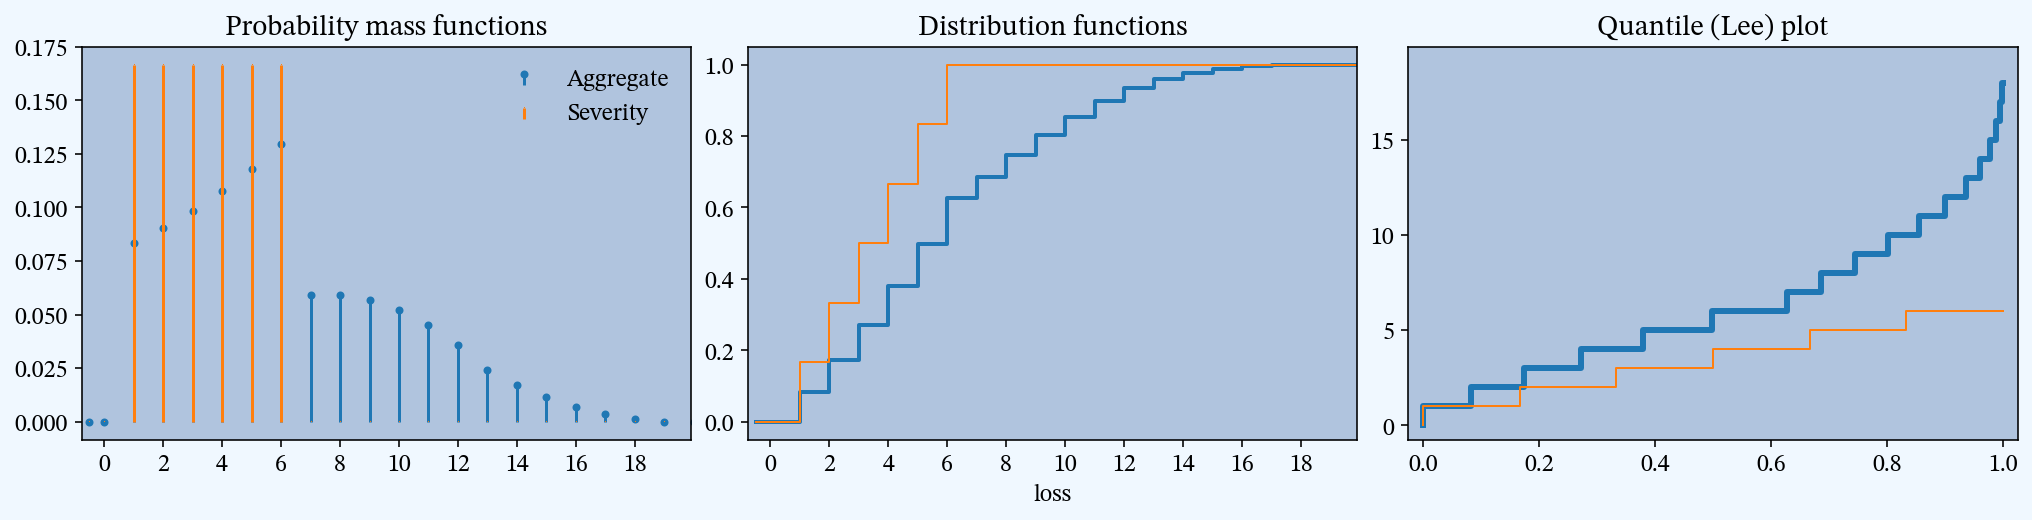

time: 562 ms (started: 2022-11-01 11:29:53 +00:00)


In [42]:
sde.plot()

| Number of vehicles | Number of intervals | Probability $N$ |
|:------------------:|:-------------------:|:---------------:|
|         0          |          4          |    4/16=0.25    |
|         1          |          6          |   6/16=0.375    |
|         2          |          4          |    4/16=0.25    |
|         3          |          2          |   2/16=0.125    |
|  Total intervals   |         16          |                 |

You also observe the number of occupants per vehicle giving the **severity distribution** $X$.

| Number of occupants | Number of vehicles | Probability $X$ |
|:-------------------:|:------------------:|:---------------:|
|          1          |         10         |   10/16=0.625   |
|          2          |         3          |   3/16=0.1875   |
|          3          |         0          |        0        |
|          4          |         3          |   3/16=0.1875   |
|   Total vehicles    |         16         |                 |

The average number of occupants equals 1.75=(10+6+12)/16=28/16

In [7]:
a = build('agg Traffic dfreq [0 1 2 3] [4/16 6/16 4/16 2/16] '
          'dsev [1 2 4] [10/16 3/16 3/16]')

time: 31 ms (started: 2022-11-01 21:52:11 +00:00)


In [8]:
a

,E[X],Est E[X],Err E[X],CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Freq,1.250,,,774.597m,,,309.839m
Sev,1.750,1.750,0.000,654.654m,654.654m,0.000,1.247
Agg,2.188,2.188,444.089a,971.008m,971.008m,1.998f,1.076


time: 16 ms (started: 2022-11-01 21:52:13 +00:00)


In [11]:
20/16 * 28/16

2.1875

time: 0 ns (started: 2022-11-01 21:59:04 +00:00)


In [10]:
28/16

1.75

time: 0 ns (started: 2022-11-01 21:55:56 +00:00)


In [12]:
a2 = build('agg Traffic.Po 1.25 claims  '
          'dsev [1 2 4] [10/16 3/16 3/16] '
          'poisson')
a2

,E[X],Est E[X],Err E[X],CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Freq,1.250,,,894.427m,,,894.427m
Sev,1.750,1.750,0.000,654.654m,654.654m,0.000,1.247
Agg,2.188,2.188,888.178a,1.069,1.069,5.773f,1.381


time: 31 ms (started: 2022-11-01 21:59:55 +00:00)


In [14]:
from aggregate.utilities import make_mosaic_figure

time: 0 ns (started: 2022-11-01 22:01:48 +00:00)


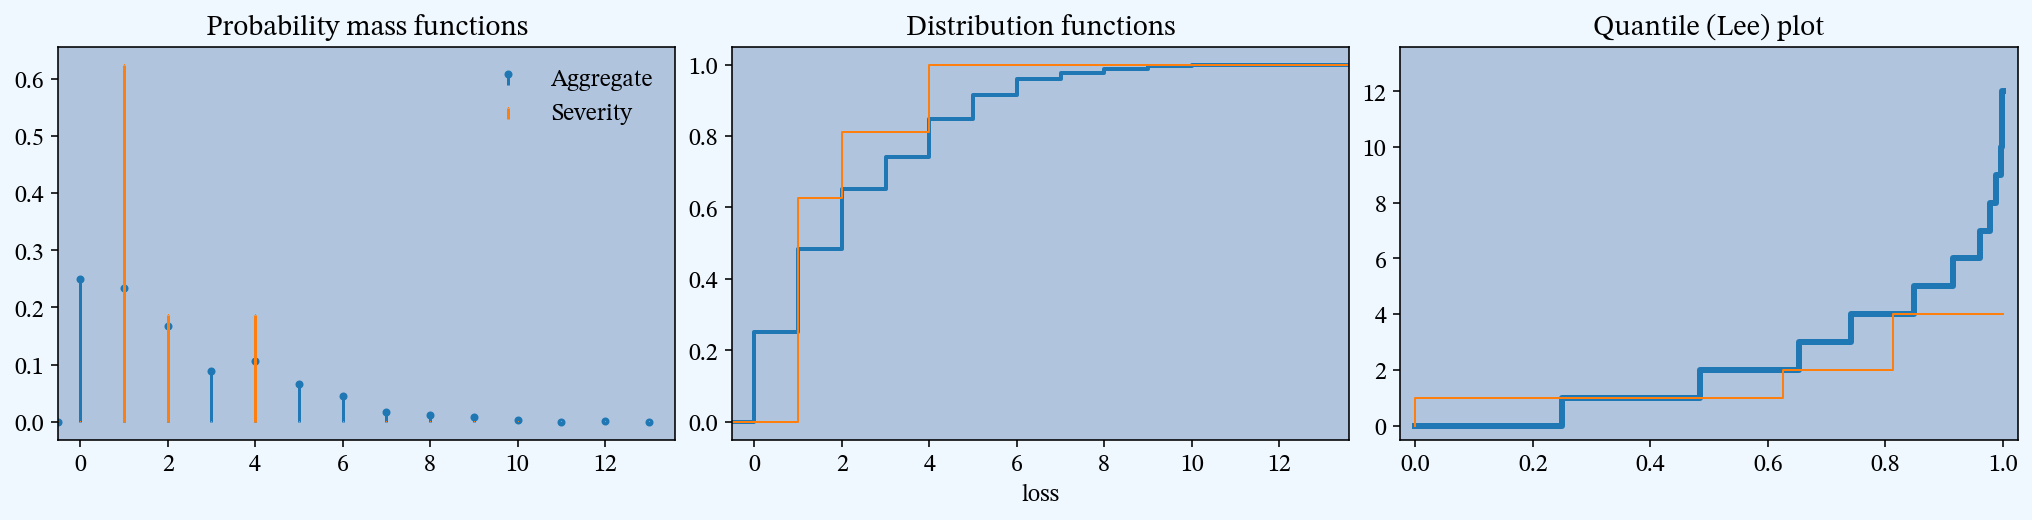

time: 500 ms (started: 2022-11-01 22:07:14 +00:00)


In [29]:
a.plot()

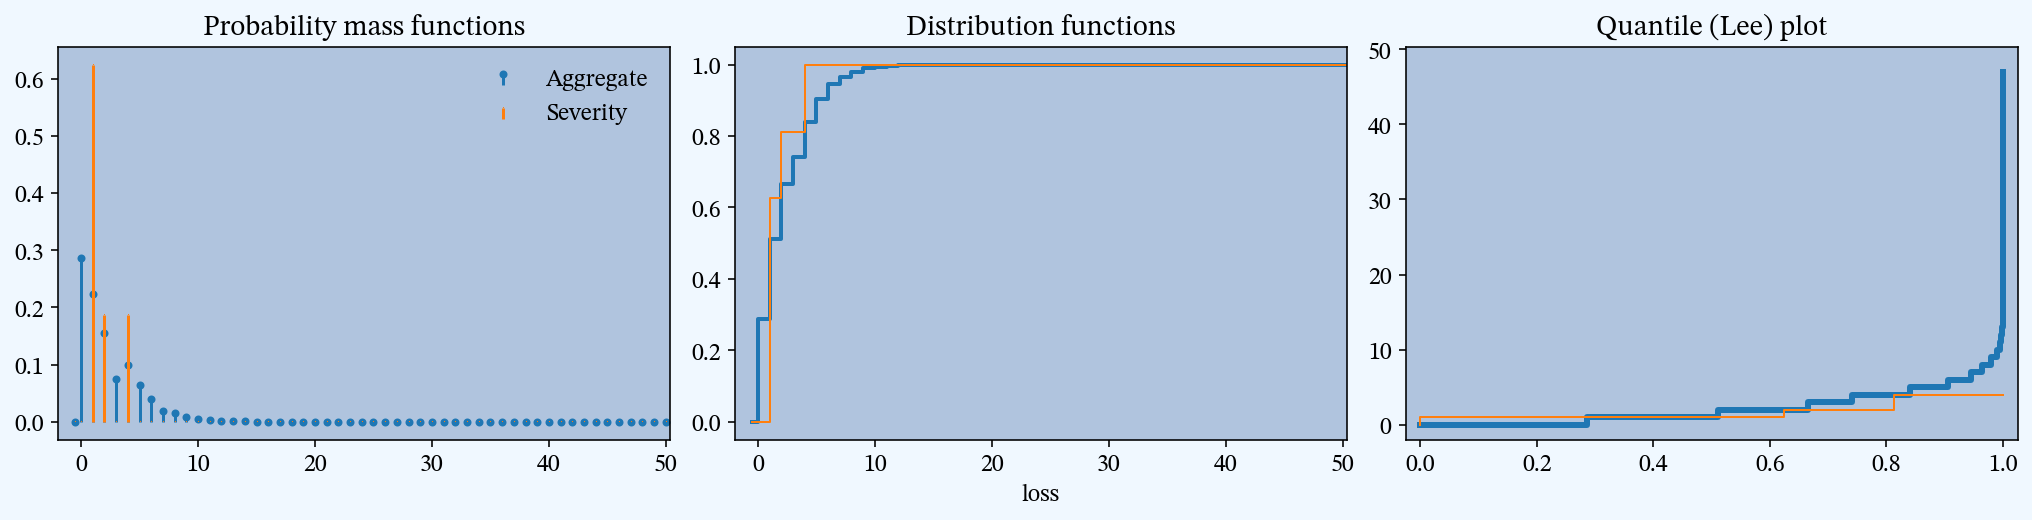

time: 547 ms (started: 2022-11-01 22:07:17 +00:00)


In [30]:
a2.plot()

In [36]:
import scipy.stats as ss 
for i in [4.5, 3.5, 2.5, 1.5, .5]:
    p = ss.pareto(i)
    print(i, p.stats('mvsk'))

4.5 (array(    1.2857), array(   0.14694), array(    5.4659), array(    146.44))
3.5 (array(       1.4), array(   0.37333), array(    11.784), array(       nan))
2.5 (array(    1.6667), array(    2.2222), array(       nan), array(       nan))
1.5 (array(         3), array(       inf), array(       nan), array(       nan))
0.5 (array(       inf), array(       inf), array(       nan), array(       nan))
time: 0 ns (started: 2022-11-02 08:25:17 +00:00)


In [31]:
a2.density_df.query('p_total > 0')

,loss,p,p_total,p_sev,log_p,log_p_sev,F,F_sev,S,S_sev,lev,exa,exlea,e,epd,exgta,exeqa
loss,,,,,,,,,,,,,,,,,
0.000,0.000,286.505m,286.505m,0.000,-1.250,inf,286.505m,0.000,713.495m,1.000,0.000,0.000,0.000,2.187,1.000,3.066,0.000
1.000,1.000,223.832m,223.832m,625.000m,-1.497,-470.004m,510.337m,625.000m,489.663m,375.000m,713.495m,713.495m,438.596m,2.187,673.831m,4.010,1.000
2.000,2.000,154.584m,154.584m,187.500m,-1.867,-1.674,664.921m,812.500m,335.079m,187.500m,1.203,1.203,801.599m,2.187,449.985m,4.938,2.000
3.000,3.000,75.230m,75.230m,0.000,-2.587,inf,740.151m,812.500m,259.849m,187.500m,1.538,1.538,1.025,2.187,296.805m,5.499,3.000
4.000,4.000,99.958m,99.958m,187.500m,-2.303,-1.674,840.109m,1.000,159.891m,0.000,1.798,1.798,1.379,2.187,178.017m,6.435,4.000
5.000,5.000,64.640m,64.640m,0.000,-2.739,inf,904.748m,1.000,95.252m,0.000,1.958,1.958,1.638,2.187,104.924m,7.410,5.000
6.000,6.000,40.380m,40.380m,0.000,-3.209,inf,945.128m,1.000,54.872m,0.000,2.053,2.053,1.824,2.187,61.380m,8.447,6.000
7.000,7.000,18.911m,18.911m,0.000,-3.968,inf,964.039m,1.000,35.961m,0.000,2.108,2.108,1.926,2.187,36.296m,9.208,7.000
8.000,8.000,15.927m,15.927m,0.000,-4.140,inf,979.965m,1.000,20.035m,0.000,2.144,2.144,2.024,2.187,19.857m,10.168,8.000


time: 109 ms (started: 2022-11-01 22:07:43 +00:00)


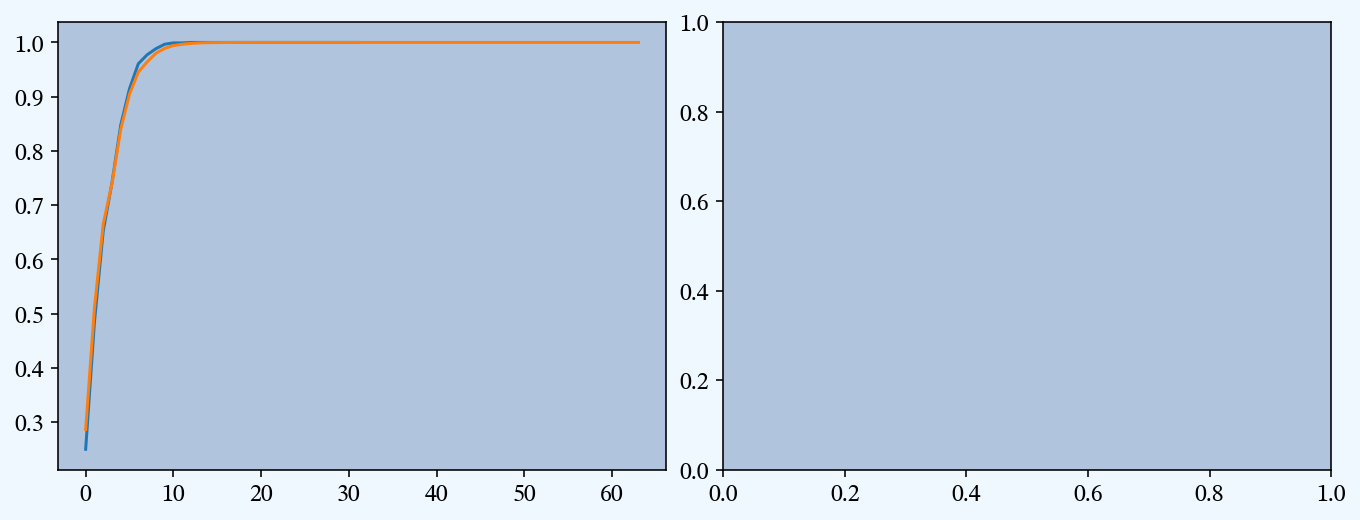

time: 266 ms (started: 2022-11-01 22:03:31 +00:00)


In [22]:
f, axd = make_mosaic_figure('AB')

axd['A'].plot(a.xs, a.agg_density.cumsum())

axd['A'].plot(a2.xs, a2.agg_density.cumsum())